In [1]:
# 1. SET GLOBAL PATH 
import sys
path2oti = '../../../build'
sys.path.append(path2oti) # Add path to OTI library.
# path2mdl = '/Users/mauriaristi/Documents/src/multi-z/Python/'
# sys.path.append(path2mdl) # Add path to MDL library.


import pyoti.dense as oti
eps = oti.e
from pyoti.core import imdir

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

from ode_solve import *

In [2]:
# Define functions

def F_eval(X):
    x = X[0]
    y = X[1]
    return [1 -  (x**2-y**2) / (x**2+y**2)**2,  -2*x*y/(x**2+y**2)**2]


In [3]:
# Define initial value (starting point of the streamline).

x0 = [-1,2]

In [28]:


x, dt_est = ode_comp_F_derivs(F_eval, x0, eps=1e-6,order = 10)

print("\nx0 :",x[0])
print("\nx1 :",x[1])

print("dt estimate: ",dt_est)

xf = np.array(X(dt_est,x))


dts:  [3.50139847 3.12850006]


x0 : -1 + 1.12 * e([1]) + 0.096 * e([[1,2]]) + 0.00597333 * e([[1,3]]) - 0.0208384 * e([[1,4]]) - 0.00950299 * e([[1,5]]) + 0.00121182 * e([[1,6]]) + 0.00269174 * e([[1,7]]) + 0.000760435 * e([[1,8]]) - 0.00033111 * e([[1,9]]) - 0.000304553 * e([[1,10]])

x1 : 2 + 0.16 * e([1]) - 0.032 * e([[1,2]]) - 0.0503467 * e([[1,3]]) - 0.0121685 * e([[1,4]]) + 0.00703338 * e([[1,5]]) + 0.0055744 * e([[1,6]]) + 0.000529025 * e([[1,7]]) - 0.00108939 * e([[1,8]]) - 0.000545107 * e([[1,9]]) + 4.10911e-05 * e([[1,10]])
dt estimate:  3.0569606807660783


In [29]:
xf

array([-16.78603632, -10.65218585])

In [35]:
dt = 1e-4
x_vals_oti1 = get_x(dt,dt_est,x,order = 1 )
x_vals_oti4 = get_x(dt,dt_est,x,order = 4 )
x_vals_oti6 = get_x(dt,dt_est,x,order = 6 )
x_vals_oti8 = get_x(dt,dt_est,x,order = 8 )
x_vals_oti9 = get_x(dt,dt_est,x,order = 9 )
x_vals_oti10= get_x(dt,dt_est,x,order = 10)


In [31]:

x_vals_euler = euler_integration(F_eval, x0,dt,dt_est)

In [32]:
x_vals_euler.shape

(30571, 2)

In [33]:

np.linalg.norm(xf-x_vals_euler[-1])

22.879334662112093

<IPython.core.display.Javascript object>


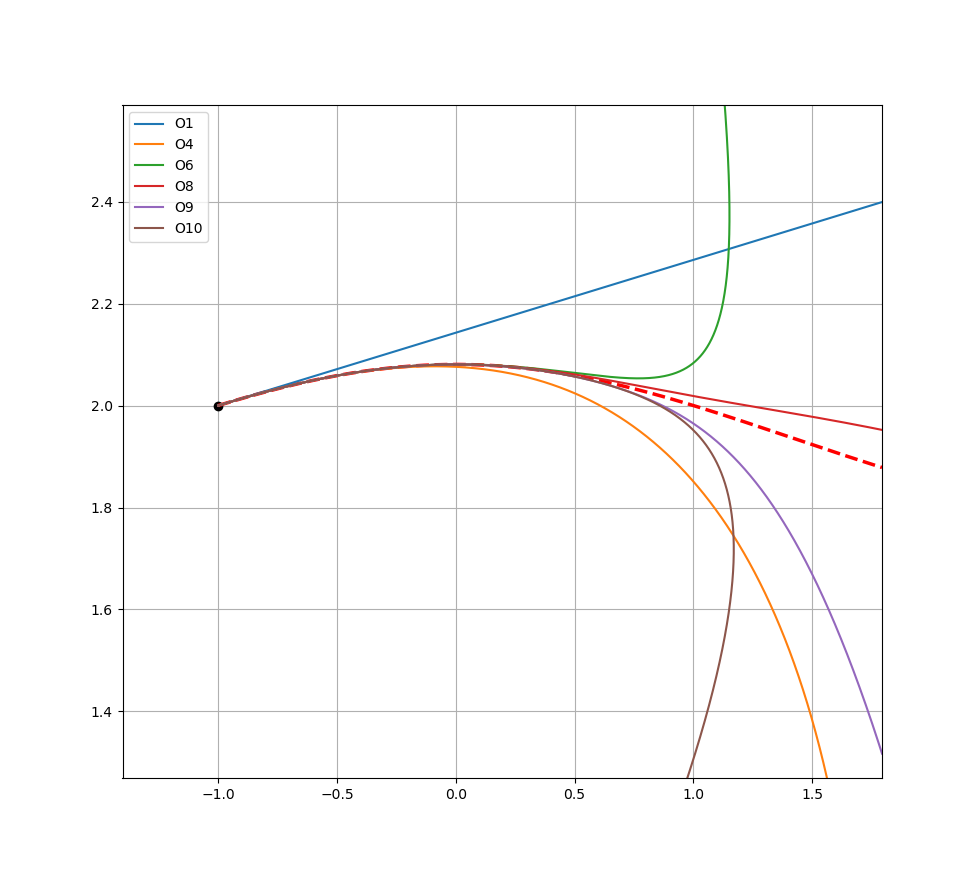

In [45]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=2.5)
plt.plot(x_vals_oti1 [:,0],x_vals_oti1 [:,1],'C0',label="O1")
plt.plot(x_vals_oti4 [:,0],x_vals_oti4 [:,1],'C1',label="O4")
plt.plot(x_vals_oti6 [:,0],x_vals_oti6 [:,1],'C2',label="O6")
plt.plot(x_vals_oti8 [:,0],x_vals_oti8 [:,1],'C3',label="O8")
plt.plot(x_vals_oti9 [:,0],x_vals_oti9 [:,1],'C4',label="O9")
plt.plot(x_vals_oti10[:,0],x_vals_oti10[:,1],'C5',label="O10")

plt.plot(xf[0],xf[1],'bo')
plt.legend()
plt.grid('on')
plt.show()

<IPython.core.display.Javascript object>


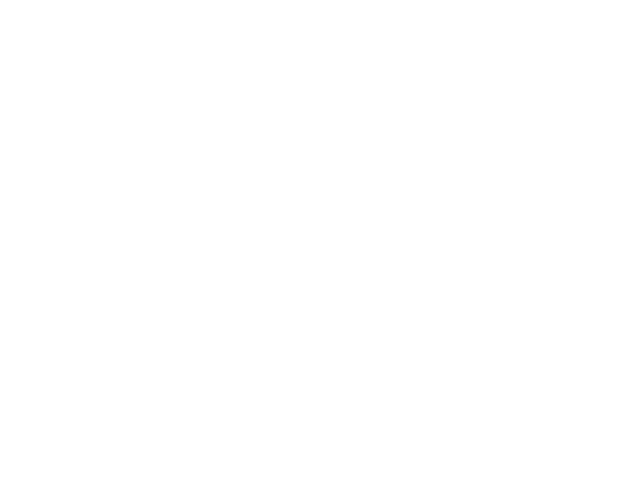

ValueError: operands could not be broadcast together with shapes (10661,) (10662,) 

In [11]:
plt.figure()

error = np.sqrt((x_vals_euler[:,0] - x_vals_oti[:,0])**2 + (x_vals_euler[:,1]-x_vals_oti[:,1])**2)
plt.plot(error,'r',linewidth=2.5)

plt.show()

In [40]:
# Analytical derivatives:

import sympy as sym

xs,ys = sym.symbols('x,y')

In [41]:
f1s,f2s = F_eval([xs,ys])

In [42]:
f1s

-(x**2 - y**2)/(x**2 + y**2)**2 + 1

In [43]:
f2s

-2*x*y/(x**2 + y**2)**2